## Import Library and read csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('fp.csv')

In [2]:
df.head(10)

,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood
0,468,01-01-2023,4530,2543.02,16.10,613,1.5,176,Walking,Clear,Park,Tired
1,879,01-01-2023,11613,1720.76,8.10,352,6.3,128,Cycling,Fog,Park,Happy
2,152,01-01-2023,27335,1706.35,3.57,236,6.7,134,Yoga,Snow,Park,Neutral
3,311,01-01-2023,13459,2912.38,6.41,1329,11.6,116,Swimming,Rain,Office,Tired
4,759,01-01-2023,15378,3344.51,17.88,52,7.4,84,Swimming,Rain,Office,Neutral
5,670,01-01-2023,29800,1812.50,16.92,1032,7.0,120,Gym Workout,Snow,Home,Stressed
6,245,01-01-2023,498,3553.37,3.31,534,7.4,154,Swimming,Snow,Gym,Stressed
7,962,01-01-2023,9081,3679.95,6.98,602,4.2,152,Gym Workout,Fog,Gym,Stressed
8,701,01-01-2023,9724,3082.07,1.16,1269,6.1,86,Running,Snow,Gym,Tired
9,412,01-01-2023,27460,1547.16,2.21,733,4.6,87,Cycling,Rain,Gym,Happy


In [3]:
df.shape

(1000000, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1000000 non-null  int64  
 1   date                1000000 non-null  object 
 2   steps               1000000 non-null  int64  
 3   calories_burned     1000000 non-null  float64
 4   distance_km         1000000 non-null  float64
 5   active_minutes      1000000 non-null  int64  
 6   sleep_hours         1000000 non-null  float64
 7   heart_rate_avg      1000000 non-null  int64  
 8   workout_type        1000000 non-null  object 
 9   weather_conditions  1000000 non-null  object 
 10  location            1000000 non-null  object 
 11  mood                1000000 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 91.6+ MB


In [5]:
df.isnull().sum()/df.shape[0]*100

user_id               0.0
date                  0.0
steps                 0.0
calories_burned       0.0
distance_km           0.0
active_minutes        0.0
sleep_hours           0.0
heart_rate_avg        0.0
workout_type          0.0
weather_conditions    0.0
location              0.0
mood                  0.0
dtype: float64

In [6]:
df.duplicated().sum()

0

In [7]:
 for i in df.select_dtypes(include="object").columns:
        print(df[i].value_counts())
        print("***"*10)

15-10-2024    1000
18-05-2025    1000
30-04-2025    1000
26-08-2025    1000
03-04-2024    1000
              ... 
08-08-2023    1000
30-05-2025    1000
12-06-2025    1000
22-03-2024    1000
25-07-2025    1000
Name: date, Length: 1000, dtype: int64
******************************
None           143120
Cycling        143115
Gym Workout    143108
Running        142774
Walking        142668
Swimming       142627
Yoga           142588
Name: workout_type, dtype: int64
******************************
Fog      250417
Rain     250059
Clear    249807
Snow     249717
Name: weather_conditions, dtype: int64
******************************
Home      200543
Office    200062
Other     199933
Gym       199853
Park      199609
Name: location, dtype: int64
******************************
Happy       250654
Stressed    250207
Neutral     249843
Tired       249296
Name: mood, dtype: int64
******************************


In [8]:
df.describe()

,user_id,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,499.550302,15005.767061,2750.008148,9.994465,719.418241,6.000228,119.458316
std,288.166608,8659.195341,721.473950,5.774298,415.894771,3.463977,34.654034
min,1.000000,0.000000,1500.000000,0.000000,0.000000,0.000000,60.000000
25%,250.000000,7492.000000,2125.517500,4.990000,359.000000,3.000000,89.000000
50%,499.000000,15020.000000,2748.310000,9.990000,719.000000,6.000000,119.000000
75%,749.000000,22507.000000,3375.190000,14.990000,1080.000000,9.000000,149.000000
max,999.000000,29999.000000,4000.000000,20.000000,1439.000000,12.000000,179.000000


In [9]:
df.describe(include="object")

,date,workout_type,weather_conditions,location,mood
count,1000000,1000000,1000000,1000000,1000000
unique,1000,7,4,5,4
top,15-10-2024,None,Fog,Home,Happy
freq,1000,143120,250417,200543,250654


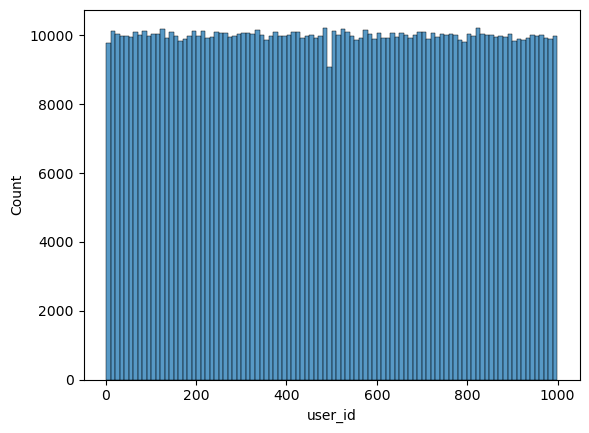

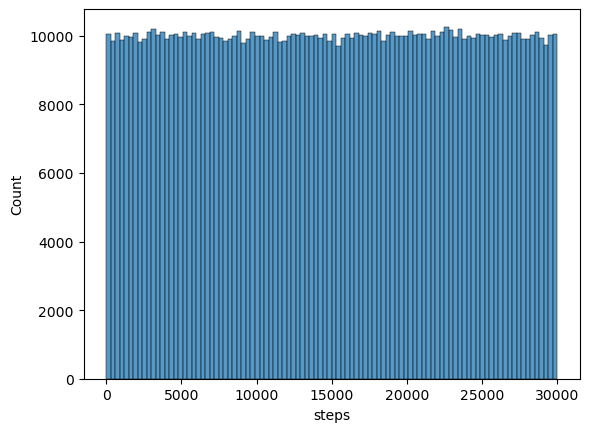

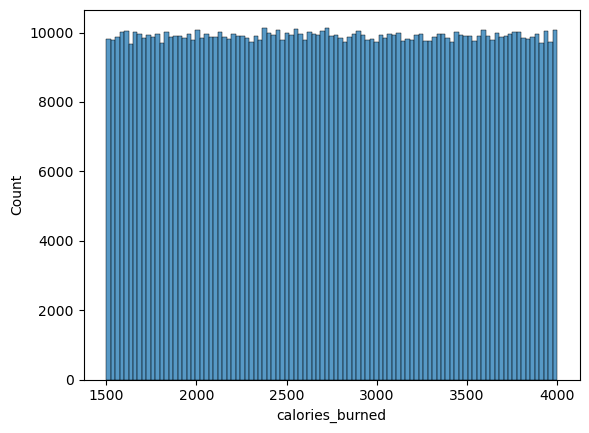

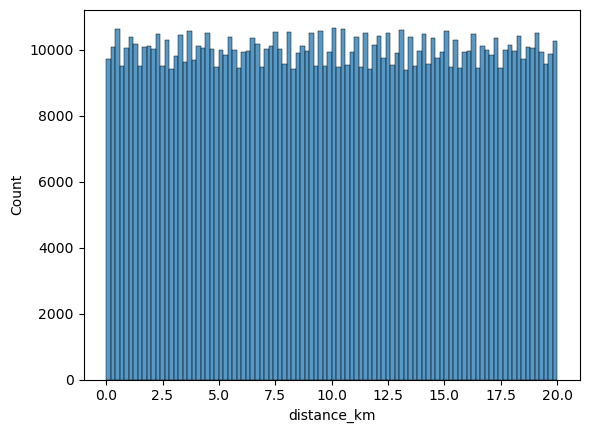

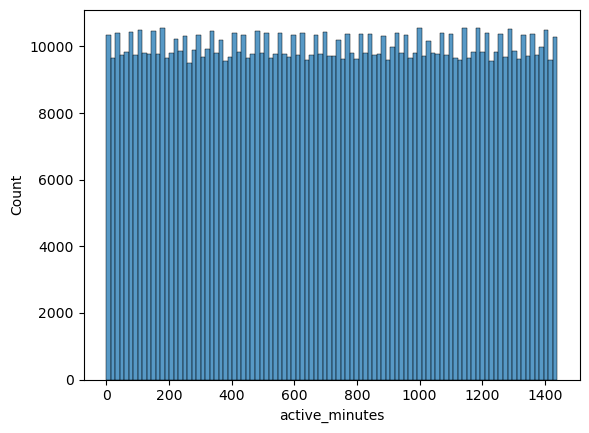

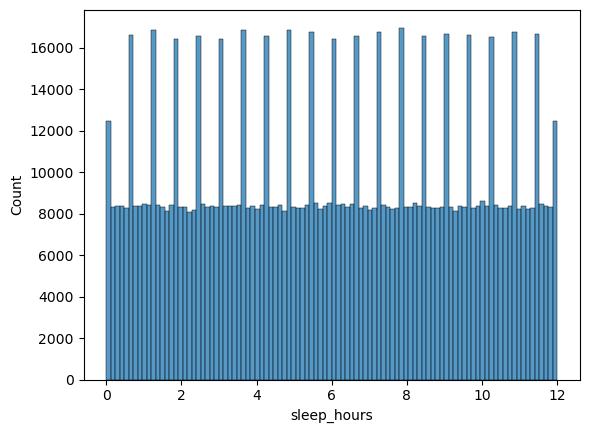

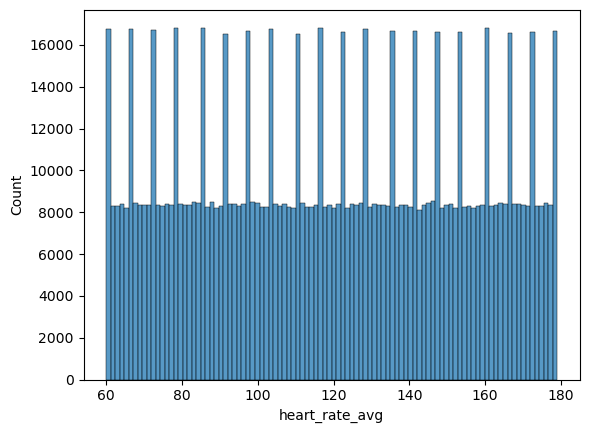

In [10]:
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i)
    plt.show()

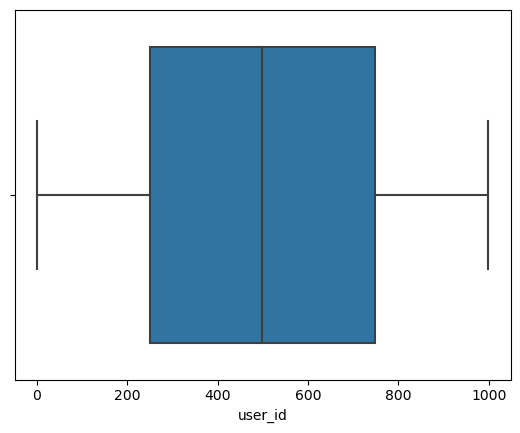

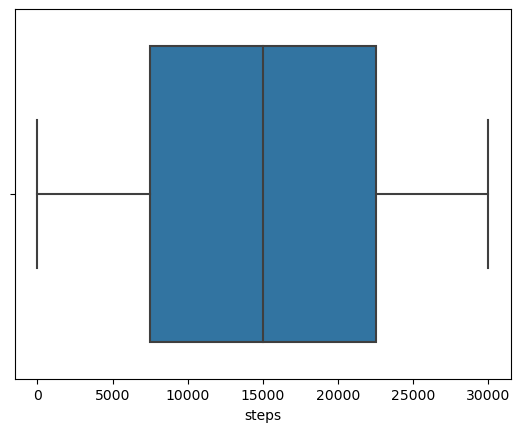

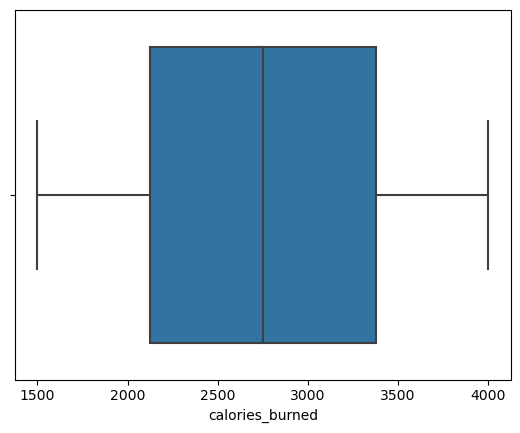

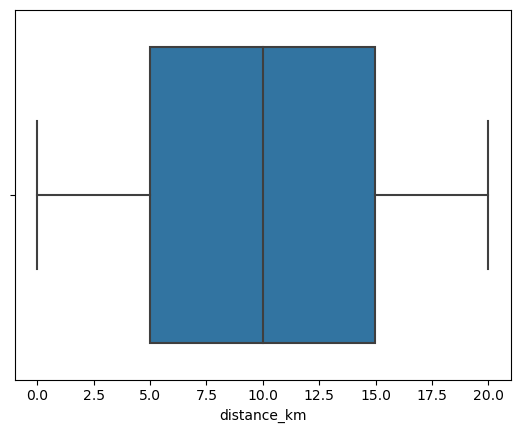

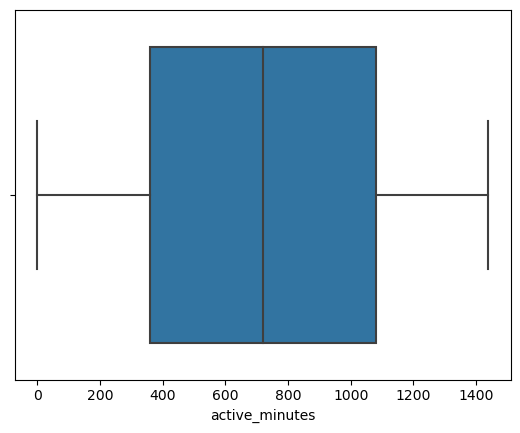

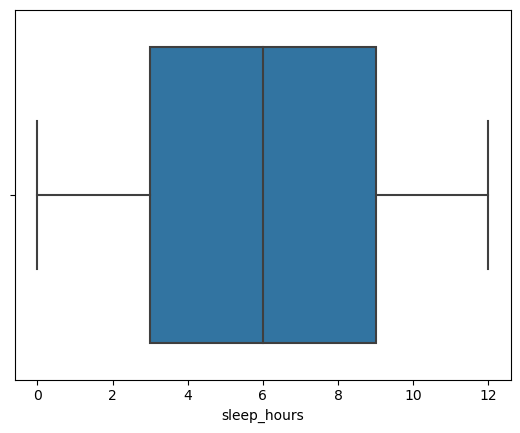

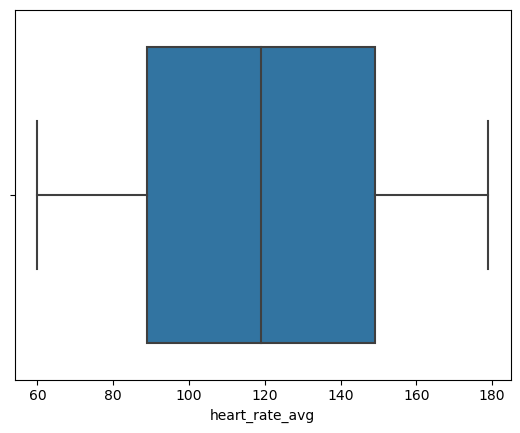

In [11]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [14]:
s=df.select_dtypes(include="number").corr()
print(s)

                  user_id     steps  calories_burned  distance_km  \
user_id          1.000000  0.001248         0.000096     0.000674   
steps            0.001248  1.000000         0.000039     0.000752   
calories_burned  0.000096  0.000039         1.000000    -0.000019   
distance_km      0.000674  0.000752        -0.000019     1.000000   
active_minutes   0.000007 -0.000199         0.000416     0.001858   
sleep_hours     -0.000973 -0.000902        -0.001989     0.000385   
heart_rate_avg  -0.000838 -0.001565        -0.000288    -0.000103   

                 active_minutes  sleep_hours  heart_rate_avg  
user_id                0.000007    -0.000973       -0.000838  
steps                 -0.000199    -0.000902       -0.001565  
calories_burned        0.000416    -0.001989       -0.000288  
distance_km            0.001858     0.000385       -0.000103  
active_minutes         1.000000    -0.000442        0.001320  
sleep_hours           -0.000442     1.000000       -0.000300  
heart_

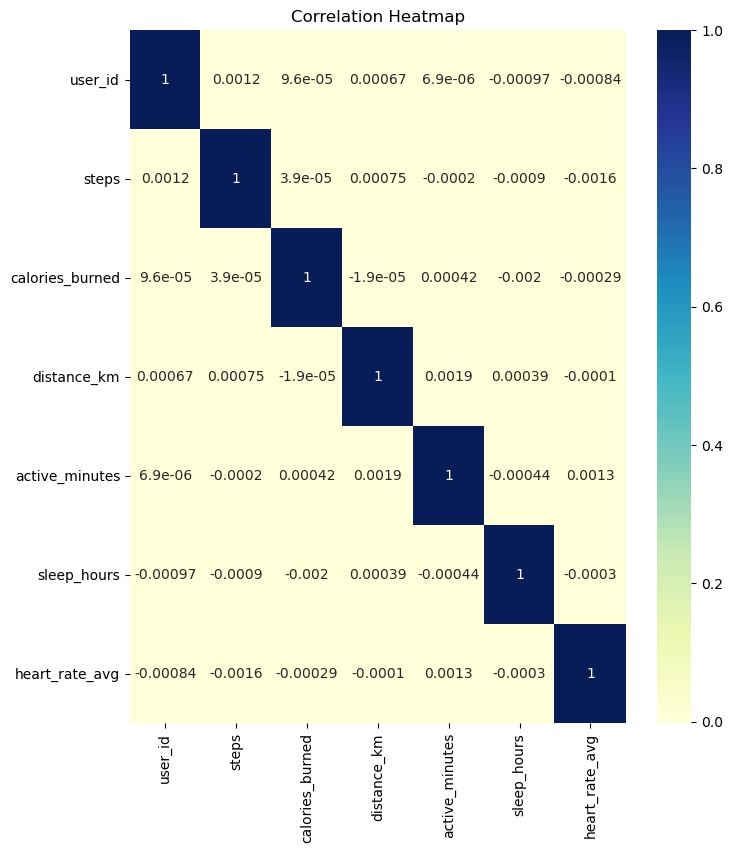

In [19]:
plt.figure(figsize=(8,9))
sns.heatmap(s, cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
# Group by the 'date' column and count the number of rows for each date
date_counts = df.groupby('date').size()

# Display the counts
print(date_counts)

date
01-01-2023    1000
01-01-2024    1000
01-01-2025    1000
01-02-2023    1000
01-02-2024    1000
              ... 
31-08-2025    1000
31-10-2023    1000
31-10-2024    1000
31-12-2023    1000
31-12-2024    1000
Length: 1000, dtype: int64


In [21]:
# Check if all date counts are exactly 1,000
all_counts_are_1000 = (date_counts == 1000).all()

if all_counts_are_1000:
    print("All dates have exactly 1,000 entries.")
else:
    print("Not all dates have 1,000 entries.")
    print("Date counts that are not 1,000:")
    print(date_counts[date_counts != 1000])

All dates have exactly 1,000 entries.


In [22]:
# Find duplicates in the 'user_id' column
duplicate_user_ids = df[df['user_id'].duplicated(keep=False)]

# Display the duplicate rows
print(duplicate_user_ids)

        user_id        date  steps  calories_burned  distance_km  \
0           468  01-01-2023   4530          2543.02        16.10   
1           879  01-01-2023  11613          1720.76         8.10   
2           152  01-01-2023  27335          1706.35         3.57   
3           311  01-01-2023  13459          2912.38         6.41   
4           759  01-01-2023  15378          3344.51        17.88   
...         ...         ...    ...              ...          ...   
999995      294  26-09-2025  21883          1711.42         4.62   
999996      114  26-09-2025  15451          3961.63         1.93   
999997       85  26-09-2025  17912          3604.77         5.81   
999998      109  26-09-2025  10072          2724.34         7.42   
999999      893  26-09-2025  29516          3713.99         6.70   

        active_minutes  sleep_hours  heart_rate_avg workout_type  \
0                  613          1.5             176      Walking   
1                  352          6.3            

In [23]:
# Find all rows where 'user_id' is 468
user_id_468 = df[df['user_id'] == 468]

# Check for duplicates within these rows
duplicated_468 = user_id_468[user_id_468.duplicated(keep=False)]

# Display the duplicated rows
print(duplicated_468)

Empty DataFrame
Columns: [user_id, date, steps, calories_burned, distance_km, active_minutes, sleep_hours, heart_rate_avg, workout_type, weather_conditions, location, mood]
Index: []


In [24]:
# Count the number of occurrences of 'user_id' 468
count_468 = df['user_id'].value_counts().get(468, 0)

print(f"user_id 468 appears {count_468} times in the dataset.")

user_id 468 appears 1006 times in the dataset.


In [30]:
# Count the occurrences of each user_id
user_id_counts = df['user_id'].value_counts()

# Find user_ids with more than 1000 entries
more_than_1000 = user_id_counts[user_id_counts > 1000].index.tolist()

# Find user_ids with less than 1000 entries
less_than_1000 = user_id_counts[user_id_counts < 1000].index.tolist()

# Find user_ids with equal to 1000 entries
equal_1000 = user_id_counts[user_id_counts == 1000].index.tolist()

print(f"user_ids with more than 1000 entries: {more_than_1000}")
print(f"user_ids with less than 1000 entries: {less_than_1000}")
print(f"user_ids with equal to 1000 entries: {equal_1000}")

user_ids with more than 1000 entries: [683, 820, 70, 219, 606, 87, 337, 301, 898, 729, 153, 128, 318, 490, 414, 484, 243, 508, 148, 818, 946, 119, 825, 26, 513, 459, 602, 830, 724, 225, 852, 287, 702, 308, 788, 501, 621, 570, 412, 331, 393, 366, 69, 327, 200, 716, 821, 196, 106, 160, 574, 247, 347, 690, 354, 101, 695, 842, 257, 988, 124, 657, 178, 869, 146, 428, 498, 940, 689, 589, 319, 27, 753, 809, 218, 255, 334, 509, 775, 967, 525, 510, 863, 18, 714, 457, 550, 418, 259, 632, 121, 776, 139, 179, 938, 664, 137, 51, 798, 380, 706, 882, 90, 692, 941, 66, 564, 71, 581, 390, 298, 449, 744, 125, 725, 213, 64, 168, 813, 909, 906, 264, 889, 20, 488, 758, 954, 339, 444, 118, 537, 630, 742, 505, 120, 477, 994, 824, 194, 655, 426, 594, 183, 807, 324, 86, 878, 152, 19, 841, 443, 487, 456, 925, 279, 615, 54, 701, 904, 277, 251, 822, 98, 667, 470, 836, 618, 50, 803, 987, 82, 527, 551, 201, 89, 195, 998, 521, 524, 732, 185, 122, 315, 531, 336, 94, 482, 209, 918, 404, 520, 442, 785, 784, 270, 691, 6

In [29]:
# Count the occurrences of each user_id
user_id_counts = df['user_id'].value_counts()

# Find user_ids with more than 1000 entries
more_than_1000 = user_id_counts[user_id_counts > 1000].index.tolist()
count_more_than_1000 = len(more_than_1000)

# Find user_ids with less than 1000 entries
less_than_1000 = user_id_counts[user_id_counts < 1000].index.tolist()
count_less_than_1000 = len(less_than_1000)

equal_1000 = user_id_counts[user_id_counts == 1000].index.tolist()
count_equal_1000 = len(equal_1000)

print(f"Total user_ids with more than 1000 entries: {count_more_than_1000}")
print(f"Total user_ids with less than 1000 entries: {count_less_than_1000}")
print(f"Total user_ids with equal to 1000 entries: {count_equal_1000}")

Total user_ids with more than 1000 entries: 512
Total user_ids with less than 1000 entries: 474
Total user_ids with equal to 1000 entries: 13


In [31]:
# Filter the DataFrame for user_id 683
user_683_df = df[df['user_id'] == 683]

# Find duplicate rows based on the 'date' column
duplicate_dates = user_683_df[user_683_df.duplicated(subset=['date'], keep=False)]

# Get the unique dates where duplicates occur
duplicate_dates_list = duplicate_dates['date'].unique()
count_duplicate_dates_list = len(duplicate_dates_list)
print(f"Dates with duplicate rows for user_id 683: {duplicate_dates_list}")
print(f"Total Dates with duplicate rows for user_id 683: {count_duplicate_dates_list}")

Dates with duplicate rows for user_id 683: ['05-01-2023' '07-01-2023' '09-01-2023' '11-01-2023' '12-01-2023'
 '16-01-2023' '17-01-2023' '23-01-2023' '25-01-2023' '02-02-2023'
 '04-02-2023' '10-02-2023' '13-02-2023' '15-02-2023' '17-02-2023'
 '22-02-2023' '23-02-2023' '24-02-2023' '05-03-2023' '12-03-2023'
 '17-03-2023' '18-03-2023' '24-03-2023' '28-03-2023' '29-03-2023'
 '01-04-2023' '04-04-2023' '06-04-2023' '07-04-2023' '09-04-2023'
 '12-04-2023' '13-04-2023' '22-04-2023' '23-04-2023' '28-04-2023'
 '30-04-2023' '05-05-2023' '08-05-2023' '12-05-2023' '18-05-2023'
 '19-05-2023' '20-05-2023' '23-05-2023' '31-05-2023' '10-06-2023'
 '13-06-2023' '16-06-2023' '20-06-2023' '22-06-2023' '23-06-2023'
 '24-06-2023' '25-06-2023' '26-06-2023' '29-06-2023' '30-06-2023'
 '01-07-2023' '02-07-2023' '03-07-2023' '04-07-2023' '07-07-2023'
 '08-07-2023' '10-07-2023' '11-07-2023' '14-07-2023' '17-07-2023'
 '18-07-2023' '21-07-2023' '23-07-2023' '27-07-2023' '01-08-2023'
 '06-08-2023' '08-08-2023' '11-08

In [39]:
# Filter the DataFrame for user_id 713
user_713_df = df[df['user_id'] == 713]

# Find duplicate rows based on the 'date' column
duplicate_dates = user_683_df[user_713_df.duplicated(subset=['date'], keep=False)]

# Get the unique dates where duplicates occur
duplicate_dates_list = duplicate_dates['date'].unique()
count_duplicate_dates_list = len(duplicate_dates_list)
#print(f"Dates with duplicate rows for user_id 713: {duplicate_dates_list}")
print(f"Total Dates with duplicate rows for user_id 713: {count_duplicate_dates_list}")

Total Dates with duplicate rows for user_id 713: 268


In [41]:
# Define the list of emp_ids
emp_id_list = [506, 713, 571, 523, 461, 39, 376, 519, 474, 837, 593, 306, 866]

# Filter the DataFrame to only include rows with emp_ids from the list
filtered_df = df[df['user_id'].isin(emp_id_list)]

# Find duplicate rows based on the 'date' column within the filtered DataFrame
duplicate_dates_df = filtered_df[filtered_df.duplicated(subset=['user_id', 'date'], keep=False)]

# Get the unique dates where duplicates occur
duplicate_dates_list = duplicate_dates_df['date'].unique()

# Get the total count of these unique dates
total_duplicate_dates = len(duplicate_dates_list)

print(f"Total number of dates with duplicate emp_id entries: {total_duplicate_dates}")

Total number of dates with duplicate emp_id entries: 980


In [43]:
# Define the list of user_ids
user_id_list = [506, 713, 571, 523, 461, 39, 376, 519, 474, 837, 593, 306, 866]

# Loop through each user_id in the list
for user_id in user_id_list:
    # Filter the DataFrame to only include rows for the current user_id
    user_df = df[df['user_id'] == user_id]
    
    # Find duplicate rows based on the 'date' column within the filtered DataFrame
    duplicate_dates_df = user_df[user_df.duplicated(subset=['user_id', 'date'], keep=False)]
    
    # Get the unique dates where duplicates occur
    duplicate_dates_list = duplicate_dates_df['date'].unique()
    
    # Get the total count of these unique dates
    total_duplicate_dates = len(duplicate_dates_list)
    
    # Print the result for the current user_id
    print(f"Total number of dates with duplicate emp_id entries for user_id {user_id}: {total_duplicate_dates}")

Total number of dates with duplicate emp_id entries for user_id 506: 266
Total number of dates with duplicate emp_id entries for user_id 713: 268
Total number of dates with duplicate emp_id entries for user_id 571: 258
Total number of dates with duplicate emp_id entries for user_id 523: 259
Total number of dates with duplicate emp_id entries for user_id 461: 261
Total number of dates with duplicate emp_id entries for user_id 39: 252
Total number of dates with duplicate emp_id entries for user_id 376: 261
Total number of dates with duplicate emp_id entries for user_id 519: 266
Total number of dates with duplicate emp_id entries for user_id 474: 275
Total number of dates with duplicate emp_id entries for user_id 837: 254
Total number of dates with duplicate emp_id entries for user_id 593: 259
Total number of dates with duplicate emp_id entries for user_id 306: 261
Total number of dates with duplicate emp_id entries for user_id 866: 272


In [44]:
# Filter the DataFrame for user_id 683 and the specific date
filtered_df = df[(df['user_id'] == 683) & (df['date'] == '2023-01-05')]

# Count the number of occurrences
count_occurrences = len(filtered_df)

print(f"user_id 683 is present {count_occurrences} times on 05-01-2023.")

user_id 683 is present 0 times on 05-01-2023.


In [46]:
# List of dates to check
date_list = ['2023-01-05', '2023-01-07', '2023-01-09', '2023-01-11', '2023-01-12',
             '2023-01-16', '2023-01-17', '2023-01-23', '2023-01-25', '2023-02-02',
             '2023-02-04', '2023-02-10', '2023-02-13', '2023-02-15', '2023-02-17',
             '2023-02-22', '2023-02-23']

# Loop through each date and count occurrences for user_id 683
for date in date_list:
    # Filter the DataFrame for user_id 683 and the specific date
    count_occurrences = len(df[(df['user_id'] == 683) & (df['date'] == date)])
    
    # Print the result for the current date
    print(f"user_id 683 is present {count_occurrences} times on {date}.")

user_id 683 is present 0 times on 2023-01-05.
user_id 683 is present 0 times on 2023-01-07.
user_id 683 is present 0 times on 2023-01-09.
user_id 683 is present 0 times on 2023-01-11.
user_id 683 is present 0 times on 2023-01-12.
user_id 683 is present 0 times on 2023-01-16.
user_id 683 is present 0 times on 2023-01-17.
user_id 683 is present 0 times on 2023-01-23.
user_id 683 is present 0 times on 2023-01-25.
user_id 683 is present 0 times on 2023-02-02.
user_id 683 is present 0 times on 2023-02-04.
user_id 683 is present 0 times on 2023-02-10.
user_id 683 is present 0 times on 2023-02-13.
user_id 683 is present 0 times on 2023-02-15.
user_id 683 is present 0 times on 2023-02-17.
user_id 683 is present 0 times on 2023-02-22.
user_id 683 is present 0 times on 2023-02-23.


In [47]:
# Get all unique user_ids from the 'user_id' column
unique_user_ids = df['user_id'].unique()

print("Unique user_ids in the dataset:")
print(unique_user_ids)

Unique user_ids in the dataset:
[468 879 152 311 759 670 245 962 701 412 201 104 555 982 254 869 844 687
 640 211 850 696 720 159 809 633 369 625 182 882 346  56 800 611 293 706
 510  15 543 364 629 308 678 177 264 778 470 758 901  91 565  26 747 132
 477 767 251 484 801  52 482 533 248 274 304 593 502 768 137 192 994 859
 908 559 250 263 448 298 376 716 219 888  32 374 814 255 363 227 317 283
 644 592 690 126 843 705 714 444 467 573 674 195 427 979 392 212 934 564
 365 478 418 614 940 847 827 615 348 434 334 960 239 498 568 457 655 252
 109 996 485 779 504 310 229 715 894 443  72 440 371 920 574 627 465 517
 266 130 110 916 297 964 513 409 501 732 952 272 519 584 973 652 214 798
  61 331 455 783 918 571 884 452 294 988 538 319 556 166 112 377 362 209
 873 699 683 391 910 558  75 242 401 856 878 228 751 259 898 792  90 108
 664 128 370 650 323  48 689 860 194 425 450 769 506 927 528 896 155 433
 566 473 360 520 820  54 335 413 402 617 535 282 681 829 971  53 590 646
 641 524 649 823 16

In [55]:
# Define the list of user_ids to check
user_id_list = [468, 879, 152, 311, 759, 670, 245, 962, 701, 412, 201, 104, 555, 982, 254, 
    869, 844, 687, 640, 211, 850, 696, 720, 159, 809, 633, 369, 625, 182, 882, 
    346, 56, 800, 611, 293, 706, 510, 15, 543, 364, 629, 308, 678, 177, 264, 778, 
    470, 758, 901, 91, 565, 26, 747, 132, 477, 767, 251, 484, 801, 52, 482, 533, 
    248, 274, 304, 593, 502, 768, 137, 192, 994, 859, 908, 559, 250, 263, 448, 
    298, 376, 716, 219, 888, 32, 374, 814, 255, 363, 227, 317, 283, 644, 592, 
    690, 126, 843, 705, 714, 444, 467, 573, 674, 195, 427, 979, 392, 212, 934, 
    564, 365, 478, 418, 614, 940, 847, 827, 615, 348, 434, 334, 960, 239, 498, 
    568, 457, 655, 252, 109, 996, 485, 779, 504, 310, 229, 715, 894, 443, 72, 
    440, 371, 920, 574, 627, 465, 517, 266, 130, 110, 916, 297, 964, 513, 409, 
    501, 732, 952, 272, 519, 584, 973, 652, 214, 798, 61, 331, 455, 783, 918, 
    571, 884, 452, 294, 988, 538, 319, 556, 166, 112, 377, 362, 209, 873, 699, 
    683, 391, 910, 558, 75, 242, 401, 856, 878, 228, 751, 259, 898, 792, 90, 
    108, 664, 128, 370, 650, 323, 48, 689, 860, 194, 425, 450, 769, 506, 927, 
    528, 896, 155, 433, 566, 473, 360, 520, 820, 54, 335, 413, 402, 617, 535, 
    282, 681, 829, 971, 53, 590, 646, 641, 524, 649, 823, 169, 44, 342, 636, 
    657, 576, 913, 942, 267, 372, 841, 85, 810, 642, 825, 572, 948, 107, 874, 
    496, 258, 428, 410, 127, 653, 534, 147, 711, 525, 336, 487, 389, 619, 185, 
    421, 698, 114, 764, 815, 976, 799, 396, 791, 398, 527, 431, 220, 819, 66, 
    808, 350, 439, 361, 544, 702, 675, 403, 863, 89, 980, 756, 845, 540, 373, 
    780, 694, 305, 890, 154, 654, 875, 103, 328, 106, 123, 306, 877, 78, 589, 
    393, 551, 36, 944, 38, 156, 999, 76, 682, 160, 16, 291, 581, 723, 537, 
    933, 430, 167, 750, 839, 118, 35, 174, 922, 577, 302, 40, 415, 774, 911, 
    834, 669, 98, 387, 4, 975, 818, 380, 446, 728, 562, 762, 862, 9, 553, 497, 
    515, 329, 821, 914, 260, 806, 153, 275, 268, 490, 632, 349, 386, 740, 97, 
    216, 74, 656, 985, 828, 131, 686, 921, 277, 357, 379, 445, 826, 635, 168, 
    29, 69, 902, 385, 83, 677, 493, 880, 713, 189, 900, 188, 936, 183, 318, 
    924, 542, 578, 178, 303, 285, 287, 505, 217, 483, 163, 500, 34, 548, 314, 
    441, 680, 672, 612, 929, 743, 414, 775, 749, 420, 175, 871, 919, 560, 647, 
    55, 143, 861, 140, 429, 725, 688, 158, 977, 231, 472, 21, 600, 486, 176, 
    721, 938, 442, 368, 30, 786, 959, 945, 969, 148, 226, 37, 610, 438, 120, 
    20, 139, 221, 744, 458, 648, 796, 583, 459, 19, 663, 157, 637, 552, 990, 
    939, 325, 187, 124, 181, 286, 692, 234, 276, 223, 776, 972, 613, 849, 760, 
    2, 607, 12, 25, 958, 165, 623, 63, 406, 77, 151, 93, 608, 338, 466, 141, 
    241, 417, 526, 309, 261, 222, 121, 330, 454, 837, 671, 419, 710, 951, 82, 
    761, 742, 586, 42, 142, 797, 621, 138, 81, 909, 354, 598, 658, 541, 594, 
    639, 80, 620, 954, 359, 367, 956, 162, 341, 6, 230, 822, 881, 99, 662, 
    961, 563, 770, 10, 695, 95, 18, 731, 404, 899, 947, 481, 824, 199, 39, 
    411, 539, 236, 557, 456, 390, 146, 27, 384, 516, 807, 253, 726, 748, 238, 
    84, 436, 172, 949, 471, 480, 782, 270, 591, 943, 134, 887, 616, 745, 196, 
    691, 983, 295, 290, 603, 926, 567, 204, 781, 479, 33, 840, 301, 737, 545, 
    70, 366, 599, 71, 703, 397, 700, 772, 31, 423, 831, 460, 746, 587, 518, 
    765, 113, 388, 344, 582, 928, 917, 57, 693, 180,281, 712, 709, 383, 867, 835, 356, 407, 511, 993, 67, 897, 766, 224, 585, 
    215, 3, 300, 164, 352, 842, 575, 23, 876, 327, 1, 279, 989, 667, 858, 193, 
    499, 784, 624, 210, 378, 284, 449, 734, 87, 265, 45, 604, 724, 492, 708, 
    915, 343, 965, 522, 122, 946, 838, 753, 968, 984, 340, 854, 424, 243, 355, 
    628, 322, 570, 395, 273, 718, 205, 206, 24, 906, 739, 930, 536, 202, 94, 
    400, 179, 353, 932, 116, 313, 514, 92, 673, 717, 777, 794, 381, 651, 461, 
    197, 793, 618, 817, 937, 17, 289, 970, 846, 597, 203, 802, 316, 864, 803, 
    986, 247, 741, 529, 941, 848, 561, 771, 521, 208, 833, 588, 68, 507, 186, 
    358, 399, 171, 101, 852, 967, 773, 28, 246, 280, 754, 601, 812, 547, 47, 
    935, 955, 320, 333, 638, 684, 240, 491, 59, 5, 476, 312, 832, 426, 7, 463, 
    133, 271, 14, 225, 569, 816, 729, 595, 256, 554, 347, 435, 405, 605, 232, 
    857, 60, 851, 462, 408, 866, 315, 805, 953, 111, 987, 630, 757, 100, 735, 
    292, 905, 795, 645, 907, 337, 432, 102, 191, 752, 665, 339, 622, 495, 738, 
    609, 811, 345, 788, 660, 685, 145, 503, 903, 631, 22, 324, 931, 11, 375, 
    865, 321, 626, 512, 394, 579, 991, 966, 64, 307, 244, 870, 974, 923, 135, 
    96, 868, 79, 763, 883, 531, 58, 963, 49, 88, 885, 787, 170, 475, 382, 904, 
    892, 46, 722, 278, 727, 523, 198, 207, 50, 957, 117, 643, 489, 416, 184, 
    992, 326, 422, 704, 736, 995, 580, 494, 998, 65, 43, 233, 596, 125, 173, 
    668, 149, 150, 912, 474, 469, 755, 200, 659, 235, 105, 697, 453, 634, 785, 
    676, 119, 549, 136, 836, 891, 488, 950, 218, 73, 733, 269, 546, 115, 813, 
    213, 886, 530, 893, 51, 237, 606, 978, 550, 249, 262, 790, 257, 730, 129, 
    830, 41, 86, 853, 437, 997, 190, 872, 288, 62, 509, 895, 144, 666, 719, 
    679, 789, 804, 8, 532, 332, 508, 661, 451, 299, 981, 889, 351, 161, 13, 
    925, 464, 296, 707, 855, 447, 602]

# Initialize an empty dictionary to store counts
user_id_counts = {}
print(len(user_id_list))
# Loop through each user_id in the list
for user_id in user_id_list:
    # Count the number of occurrences for each user_id
    count = len(df[df['user_id'] == user_id])
    
    # Store the count in the dictionary
    user_id_counts[user_id] = count

# Print the results
print("Number of entries for each user_id:")
for user_id, count in user_id_counts.items():
    print(f"user_id {user_id} has {count} entries.")

999
Number of entries for each user_id:
user_id 468 has 1006 entries.
user_id 879 has 1002 entries.
user_id 152 has 1036 entries.
user_id 311 has 1018 entries.
user_id 759 has 1007 entries.
user_id 670 has 1002 entries.
user_id 245 has 1020 entries.
user_id 962 has 1008 entries.
user_id 701 has 1035 entries.
user_id 412 has 1058 entries.
user_id 201 has 1031 entries.
user_id 104 has 1005 entries.
user_id 555 has 926 entries.
user_id 982 has 964 entries.
user_id 254 has 1017 entries.
user_id 869 has 1049 entries.
user_id 844 has 1015 entries.
user_id 687 has 960 entries.
user_id 640 has 1004 entries.
user_id 211 has 1016 entries.
user_id 850 has 995 entries.
user_id 696 has 1028 entries.
user_id 720 has 942 entries.
user_id 159 has 971 entries.
user_id 809 has 1047 entries.
user_id 633 has 991 entries.
user_id 369 has 997 entries.
user_id 625 has 964 entries.
user_id 182 has 986 entries.
user_id 882 has 1041 entries.
user_id 346 has 968 entries.
user_id 56 has 972 entries.
user_id 800 h

In [54]:
# Calculate the total count of all values
total_count = sum(user_id_counts.values())

# Display the total count
print(f"Total count of all entries: {total_count}")

Total count of all entries: 1000000


In [57]:
import os

# Load your data
df = pd.read_csv('fp.csv')  # Replace 'your_file.csv' with your actual file name

# Group by 'user_id'
grouped = df.groupby('user_id')

# Define the directory where files will be saved
output_dir = 'user_files'  # Change 'user_files' to your desired folder name

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save each group to a separate CSV file in the specified directory
for user_id, group in grouped:
    filename = f'user_{user_id}.csv'  # Filename for each user
    filepath = os.path.join(output_dir, filename)  # Full path to save the file
    group.to_csv(filepath, index=False)  # Save the group to a CSV file

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1000000 non-null  int64  
 1   date                1000000 non-null  object 
 2   steps               1000000 non-null  int64  
 3   calories_burned     1000000 non-null  float64
 4   distance_km         1000000 non-null  float64
 5   active_minutes      1000000 non-null  int64  
 6   sleep_hours         1000000 non-null  float64
 7   heart_rate_avg      1000000 non-null  int64  
 8   workout_type        1000000 non-null  object 
 9   weather_conditions  1000000 non-null  object 
 10  location            1000000 non-null  object 
 11  mood                1000000 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 91.6+ MB


In [59]:
df.describe()

,user_id,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,499.550302,15005.767061,2750.008148,9.994465,719.418241,6.000228,119.458316
std,288.166608,8659.195341,721.473950,5.774298,415.894771,3.463977,34.654034
min,1.000000,0.000000,1500.000000,0.000000,0.000000,0.000000,60.000000
25%,250.000000,7492.000000,2125.517500,4.990000,359.000000,3.000000,89.000000
50%,499.000000,15020.000000,2748.310000,9.990000,719.000000,6.000000,119.000000
75%,749.000000,22507.000000,3375.190000,14.990000,1080.000000,9.000000,149.000000
max,999.000000,29999.000000,4000.000000,20.000000,1439.000000,12.000000,179.000000
